In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:, 0]**2 + 0.05*np.random.randn(100)

In [4]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [5]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

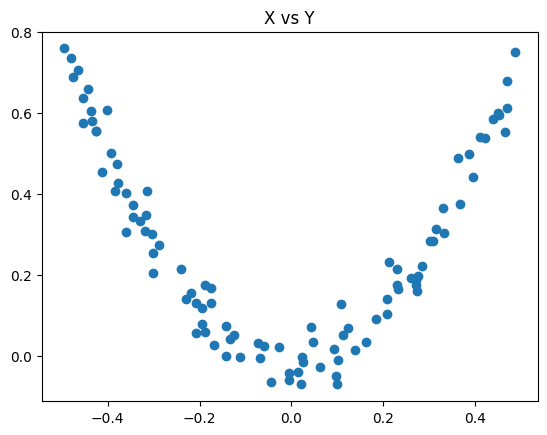

In [6]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [7]:
df['pred1'] = df['y'].mean()

In [8]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [9]:
df['res1'] = df['y'] - df['pred1']

In [10]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


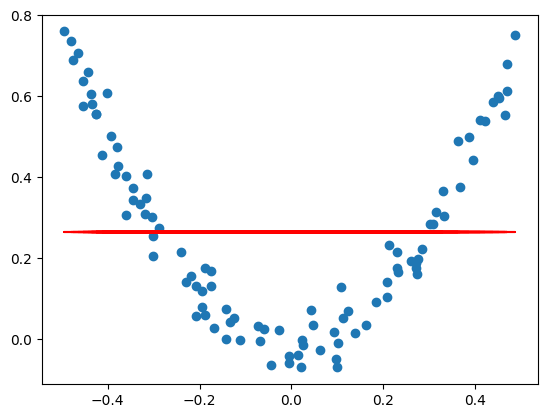

In [11]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color = 'red')

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


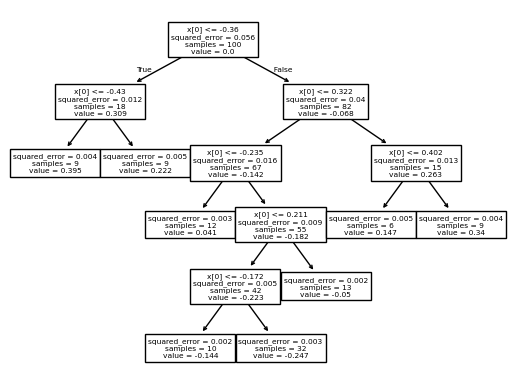

In [13]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [14]:
#generating x_test

X_test = np.linspace(-0.5, 0.5, 500)

In [15]:
y_pred = 0.26548+tree1.predict(X_test.reshape(500,1))

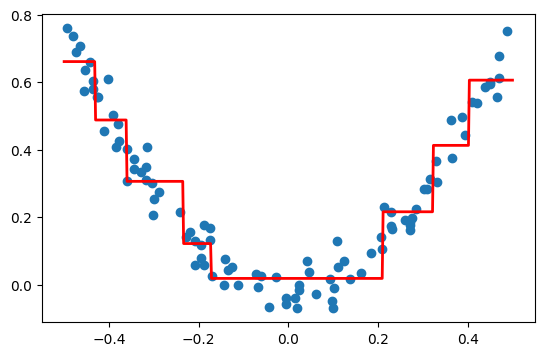

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = 'red')
plt.scatter(df['X'], df['y'])

In [17]:
df['pred2']= 0.26548 + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018341
1,0.450714,0.594480,0.265458,0.329021,0.605906
2,0.231994,0.166052,0.265458,-0.099407,0.215806
3,0.098658,-0.070178,0.265458,-0.335636,0.018341
4,-0.343981,0.343986,0.265458,0.078528,0.305986
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018341
96,0.022733,-0.002305,0.265458,-0.267763,0.018341
97,-0.072459,0.032809,0.265458,-0.232650,0.018341
98,-0.474581,0.689516,0.265458,0.424057,0.660934


In [18]:
df['res2'] = df['y'] - df['pred2']

In [19]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [20]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1, tree2])

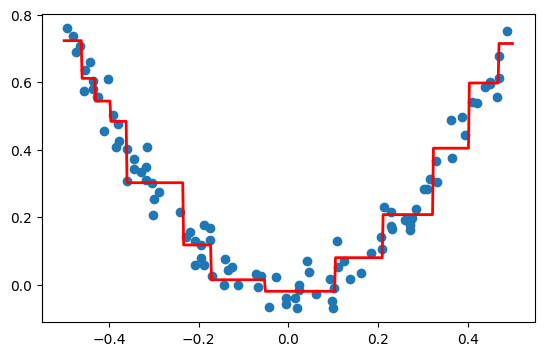

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = 'red')
plt.scatter(df['X'], df['y'])

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39
